### Importação das bibliotecas

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Importação dos dados

In [33]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementação do UCB

In [34]:
N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
numbers_of_selections = [0] * d 
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_upper_bound = 0

  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1 
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += reward
  total_reward += reward

### Visualização dos resultados

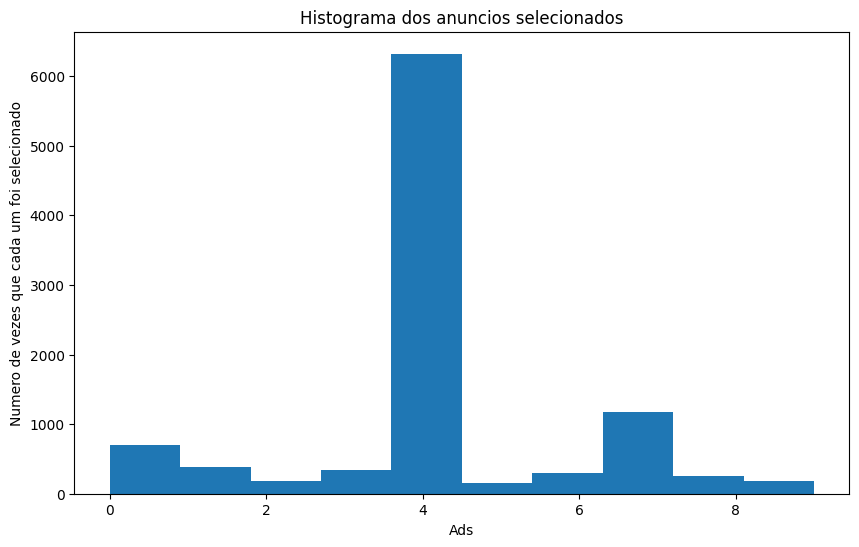

In [35]:
plt.figure(figsize=(10,6))
plt.hist(ads_selected)
plt.title("Histograma dos anuncios selecionados")
plt.xlabel("Ads")
plt.ylabel("Numero de vezes que cada um foi selecionado")
plt.show()